### Visualization

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re

import data; data = cleaned_data_3 from project notebook

In [2]:
cleaned_data_3=pd.read_csv('cleaned_data_all.csv')

get year

In [3]:
eda_data=cleaned_data_3.assign(year = cleaned_data_3.release_date.str.extract("^(.{4})-")[0].fillna(0).astype(int))

In [4]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  45463 non-null  int64  
 1   belongs_to_collection       45463 non-null  bool   
 2   budget                      45463 non-null  int64  
 3   genres                      45463 non-null  object 
 4   original_language           45452 non-null  object 
 5   overview                    44509 non-null  object 
 6   popularity                  45463 non-null  float64
 7   production_companies        45463 non-null  object 
 8   production_countries        45463 non-null  object 
 9   release_date                45376 non-null  object 
 10  revenue                     45463 non-null  float64
 11  runtime                     45463 non-null  float64
 12  spoken_languages            45463 non-null  object 
 13  title                       454

High rating movies

In [14]:
eda_data[['title','vote_average','popularity']][eda_data.vote_average>=9.8].sort_values(by='popularity').title.values

array(['Demidovy', 'Neither Wolf Nor Dog', 'Aashiq', 'Jedi Junior High',
       'Lo Sound Desert', 'In Search of Ancient Astronauts',
       "Scott Hall: Living on a Razor's Edge", 'One Night Only',
       'Dinosaurs!  A Fun-Filled Trip Back In Time',
       'Claymation Comedy of Horrors', 'Chilly Scenes of Winter',
       'Perfumed Nightmare', 'Shark Kill',
       "Ollie Hopnoodle's Haven of Bliss", 'Macbeth', 'Maula Jat',
       'Nocturne Indien', 'Mad As Hell', 'Canal Zone',
       'Joe Cocker - Mad Dogs & Englishmen',
       'Portrait of a Young Man in Three Movements', 'The Danube Exodus',
       'Other Voices Other Rooms', 'Has the Film Already Started?',
       'The Crush', 'Pan', 'The Haunted World of Edward D. Wood, Jr.',
       'Hori Smoku Sailor Jerry', "Tom Brown's School Days", 'Oh, Bomb!',
       'Back to School with Franklin', 'Road to Redemption',
       'Book of Days', 'Love at 16', 'The Guide',
       'Pavement: Slow Century', 'Ween: Live in Chicago', 'Pin Boy',
     

Popularity and rating

<AxesSubplot:xlabel='popularity', ylabel='vote_average'>

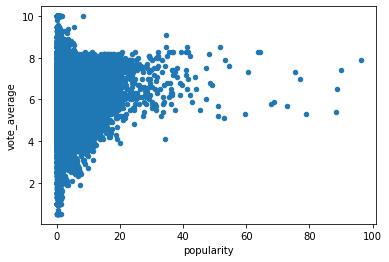

In [23]:
eda_data[['vote_average','popularity']][(eda_data.vote_average>0)&(eda_data.popularity<100)].plot(kind='scatter', x='popularity',y='vote_average')

Belong to collection

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 10.0)

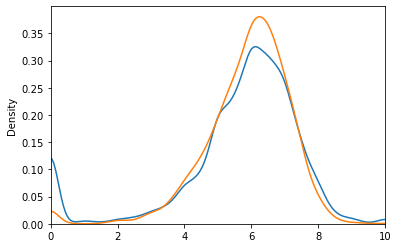

In [9]:
belong_to_collection=cleaned_data_3[cleaned_data_3.belongs_to_collection].vote_average.values
not_belong_to_collection=cleaned_data_3[cleaned_data_3.belongs_to_collection==False].vote_average.values
fig, ax = plt.subplots()
for a in [belong_to_collection, not_belong_to_collection]:
    sns.distplot(a, ax=ax, hist=False,kde=True )
ax.set_xlim([0, 10])

belongs to collection and year and IMDb rating

<AxesSubplot:xlabel='year', ylabel='vote_average'>

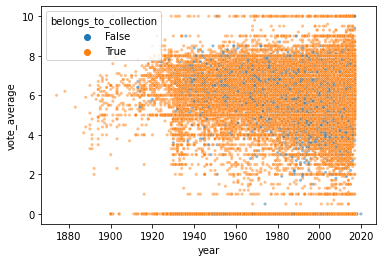

In [34]:
sns.scatterplot(data=eda_data[eda_data.year>0], 
                x="year", y="vote_average",s=10, alpha=0.5,
                hue = 'belongs_to_collection')

Text(0.5, 1.0, 'Movies belong to a collection')

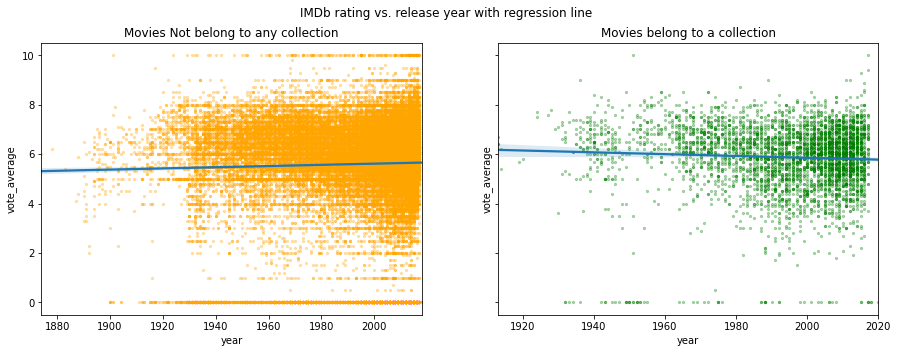

In [66]:
belong_to_collection=cleaned_data_3[cleaned_data_3.belongs_to_collection].vote_average.values
not_belong_to_collection=cleaned_data_3[cleaned_data_3.belongs_to_collection==False].vote_average.values
fig, ax = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))
sns.regplot(ax=ax[0],data=eda_data[(eda_data.year>0) & (cleaned_data_3.belongs_to_collection==True) ], 
                x="year", y="vote_average", ci=99,
           scatter_kws={"s": 5, 'color':'orange', 'alpha':0.3})
sns.regplot(ax=ax[1],data=eda_data[(eda_data.year>0) & (cleaned_data_3.belongs_to_collection==False) ], 
                x="year", y="vote_average", ci=99,
            scatter_kws={"s": 5, 'color':'g', 'alpha':0.3})
#set titles
fig.suptitle('IMDb rating vs. release year with regression line')
ax[0].set_title('Movies Not belong to any collection')
ax[1].set_title('Movies belong to a collection')


#ax.set_xlim([0, 10])

In [68]:
import scipy
from scipy.stats import pearsonr

In [70]:
#pearson r
print(scipy.stats.pearsonr(eda_data[(eda_data.year>0) & (cleaned_data_3.belongs_to_collection==True) ].year,
                     eda_data[(eda_data.year>0) & (cleaned_data_3.belongs_to_collection==True) ].vote_average
                ))
print(scipy.stats.pearsonr(eda_data[(eda_data.year>0) & (cleaned_data_3.belongs_to_collection==False) ].year,
                     eda_data[(eda_data.year>0) & (cleaned_data_3.belongs_to_collection==False) ].vote_average
                ))

(0.029912133373643485, 1.3821320614338902e-09)
(-0.05583074883941208, 0.00021797550309329895)


Release year

(0.02613803498693231, 2.5675171382267582e-08)
None


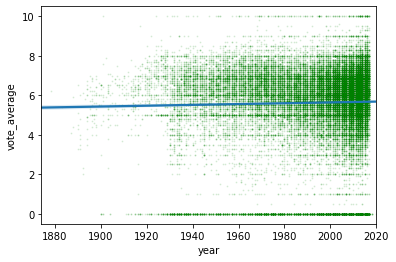

In [74]:
sns.regplot(data=eda_data[(eda_data.year>0)], 
                x="year", y="vote_average", ci=99,
            scatter_kws={"s":1, 'color':'g', 'alpha':0.1})
print(print(scipy.stats.pearsonr(eda_data[(eda_data.year>0) ].year,
                     eda_data[(eda_data.year>0) ].vote_average
                )))

In [96]:
from sklearn.preprocessing import MultiLabelBinarizer
def generate_all_categories(ser):
    # takes in series of list, generate all unique values
    all_value = ser.values.sum()
    all_cat=pd.Series(all_value)
    return all_cat.value_counts().sort_values(ascending= False) # all_value.value_counts() # the unique value counts

In [87]:
df_cleaned = cleaned_data_3
genres_types_counts= generate_all_categories(df_cleaned.genres)
production_companies_names_counts = generate_all_categories(df_cleaned.production_companies)
production_countries_names_counts = generate_all_categories(df_cleaned.production_countries)
spoken_languages_names_counts = generate_all_categories(df_cleaned.spoken_languages)

In [88]:
# Count the number of production companies, include the ones more than 100
sum(production_companies_names_counts.values > 100)

0

In [90]:
#generate list of existing classes
genres_types=genres_types_counts.index.to_list()
production_companies_names=production_companies_names_counts.index.to_list()
production_countries_names=production_countries_names_counts.index.to_list()
spoken_languages_names=spoken_languages_names_counts.index.to_list()
class_dict={'genres':genres_types,
            'production_companies':production_companies_names, 
            'production_countries':production_countries_names,
            'spoken_languages':spoken_languages_names}

In [91]:
def get_one_hot_df(df, column, top_popular_class_num=None, concat_df=False ):
    '''
    df: input feature table
    column: exact name of the columns need to be one_hot encoded {'genres','production_companies', 'production_countries','spoken_languages'}
    top_popular_class_num: the number of top most common categories to include in one hot, default
    concat_df: False: return ony the table of onehot encoding matrix. True: concat the one hot matrix to input df and return 
    '''
    #generate one hot coding matrix
    classes=class_dict[column]
    #take top _15_ most popular genres
    if top_popular_class_num==None:
        num_col=len(classes)
    else:
        num_col=top_popular_class_num
        
    mlb = MultiLabelBinarizer(classes=classes)
    feature_one_hot=mlb.fit_transform(df[column])

    #one-hot table
    one_hot_df=pd.DataFrame(data=feature_one_hot, columns=classes).iloc[:,:num_col]
    if concat_df==False:
        return one_hot_df
    else: 
        # concatinated to the orginal table
        example_one_hot_table=pd.concat([df,one_hot_df], axis=1 )
        return example_one_hot_table

genres

In [71]:
df=cleaned_data_3
column='genres'
top_popular_class_num=20
concat_df = False

get_one_hot_df(df, column, top_popular_class_num, concat_df)
one_hot_df_genres=get_one_hot_df(df, column, top_popular_class_num, concat_df=False)
one_hot_df_genres

,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,Family,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
45459,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45460,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

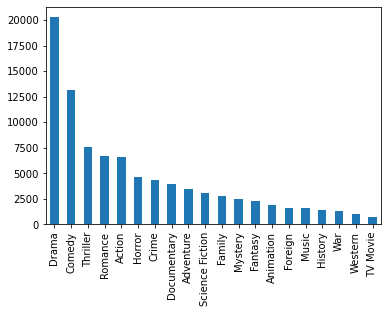

In [78]:
one_hot_df_genres.sum(axis=0).plot(kind='bar')

In [107]:
cleaned_data_3.columns

Index(['Unnamed: 0', 'belongs_to_collection', 'budget', 'genres',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title', 'video', 'vote_average', 'vote_count',
       'genres_count', 'production_companies_count', 'spoken_languages_count',
       'vote_count_log', 'only_produced_by_US'],
      dtype='object')

In [134]:
feature_selection = pd.DataFrame()

In [137]:

feature_selection=feature_selection.assign(features=['baseline', 'Genres one hot','Top 29 common production companies',
                             'Belongs_to_collection', 'Production_countries (OneHot)',
                             'Release year','Release month',
                             'Spoken_languages (OneHot)'])
feature_selection=feature_selection.assign(RMSE_Random_Forest = [1.15438, 1.07822931788199, 1.1456780761880008,
                                               1.1419469239061752,1.1466818139731636,
                                               1.1053558566331771,1.1607715023952327,
                                               1.1407344116068705])
feature_selection['RMSE_Random_Forest']=feature_selection['RMSE_Random_Forest'].round(4)

feature_selection=feature_selection.assign(RMSE_change =feature_selection.RMSE_Random_Forest- 1.15438)
feature_selection['RMSE_change']=feature_selection['RMSE_change'].round(4)

feature_selection=feature_selection.assign(sufficient_improvement =feature_selection.RMSE_change<-0.02)
feature_selection

,features,RMSE_Random_Forest,RMSE_change,sufficient_improvement
0,baseline,1.1544,0.0000,False
1,Genres one hot,1.0782,-0.0762,True
2,Top 29 common production companies,1.1457,-0.0087,False
3,Belongs_to_collection,1.1419,-0.0125,False
4,Production_countries (OneHot),1.1467,-0.0077,False
5,Release year,1.1054,-0.0490,True
6,Release month,1.1608,0.0064,False
7,Spoken_languages (OneHot),1.1407,-0.0137,False


In [140]:
feature_selection_2 = pd.DataFrame()
feature_selection_2=feature_selection_2.assign(features_combination=['baseline', 'Genres + production_companies (OneHot)',
                                                         'Belongs_to_collection + release year', 'Genres + release year + release month'])
feature_selection_2=feature_selection_2.assign(RMSE_Random_Forest = [1.15438, 1.06395398502704,
                                                                    1.1033774780240175, 1.0241758305910285])
feature_selection_2['RMSE_Random_Forest']=feature_selection_2['RMSE_Random_Forest'].round(4)

feature_selection_2=feature_selection_2.assign(RMSE_change =feature_selection_2.RMSE_Random_Forest- 1.15438)
feature_selection_2['RMSE_change']=feature_selection_2['RMSE_change'].round(4)

feature_selection_2=feature_selection_2.assign(sufficient_improvement =feature_selection_2.RMSE_change<-0.02)
feature_selection_2

,features_combination,RMSE_Random_Forest,RMSE_change,sufficient_improvement
0,baseline,1.1544,0.0000,False
1,Genres + production_companies (OneHot),1.0640,-0.0904,True
2,Belongs_to_collection + release year,1.1034,-0.0510,True
3,Genres + release year + release month,1.0242,-0.1302,True


In [27]:
feature_selection=pd.DataFrame()
feature_selection=feature_selection.assign(features=['baseline', 'Genres one hot','common production companies (One Hot)',
                             'Belongs_to_collection', 'Production_countries (OneHot)',
                             'Release year','Release month',
                             'Spoken_languages (OneHot)'])
feature_selection=feature_selection.assign(RMSE_Random_Forest = [ 1.16494, 1.08536,1.16230091, 1.161798,
                                                                  1.1671787, 1.1148489,1.1740,1.163662745863
                                                                ])
feature_selection['RMSE_Random_Forest']=feature_selection['RMSE_Random_Forest'].round(4)

feature_selection=feature_selection.assign(RMSE_change =feature_selection.RMSE_Random_Forest- 1.16494)
feature_selection['RMSE_change']=feature_selection['RMSE_change'].round(4)

feature_selection=feature_selection.assign(sufficient_improvement =feature_selection.RMSE_change<-0.02)
feature_selection

,features,RMSE_Random_Forest,RMSE_change,sufficient_improvement
0,baseline,1.1649,0.0105,False
1,Genres one hot,1.0854,-0.0690,True
2,common production companies (One Hot),1.1623,0.0079,False
3,Belongs_to_collection,1.1618,0.0074,False
4,Production_countries (OneHot),1.1672,0.0128,False
5,Release year,1.1148,-0.0396,True
6,Release month,1.1740,0.0196,False
7,Spoken_languages (OneHot),1.1637,0.0093,False


In [29]:
feature_selection_2 = pd.DataFrame()
feature_selection_2=feature_selection_2.assign(features_combination=['baseline', 'Genres + production_companies (OneHot)',
                                                         'Belongs_to_collection + release year', 'Genres + release year + release month'])
feature_selection_2=feature_selection_2.assign(RMSE_Random_Forest = [1.15438, 1.06552506552704,
                                                                    1.10153038,1.0159957])
feature_selection_2['RMSE_Random_Forest']=feature_selection_2['RMSE_Random_Forest'].round(4)

feature_selection_2=feature_selection_2.assign(RMSE_change =feature_selection_2.RMSE_Random_Forest- 1.15438)
feature_selection_2['RMSE_change']=feature_selection_2['RMSE_change'].round(4)

feature_selection_2=feature_selection_2.assign(sufficient_improvement =feature_selection_2.RMSE_change<-0.02)
feature_selection_2

,features_combination,RMSE_Random_Forest,RMSE_change,sufficient_improvement
0,baseline,1.1544,0.0000,False
1,Genres + production_companies (OneHot),1.0655,-0.0889,True
2,Belongs_to_collection + release year,1.1015,-0.0529,True
3,Genres + release year + release month,1.0160,-0.1384,True


In [141]:
df=pd.DataFrame({'a':[10,20], 'b':[10,20]})

In [143]:
df[['a']]

,a
0,10
1,20


In [146]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [148]:
corpus = ['aaa ss fff', 'ddd aaa fff']

In [149]:
v=TfidfVectorizer()
X=v.fit_transform(corpus)

In [156]:
print(X)

  (0, 2)	0.5015489070943787
  (0, 3)	0.7049094889309326
  (0, 0)	0.5015489070943787
  (1, 1)	0.7049094889309326
  (1, 2)	0.5015489070943787
  (1, 0)	0.5015489070943787


In [159]:
X

<2x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [163]:
import pandas as pd
df=pd.DataFrame.sparse.from_spmatrix(X)

In [165]:
df.columns=['a','b','c','d']

In [166]:
df

,a,b,c,d
0,0.501549,0.000000,0.501549,0.704909
1,0.501549,0.704909,0.501549,0.000000


In [167]:
pd.Series({'a':1,'b':3})

a    1
b    3
dtype: int64